# Convolutional Neural Network Architecture

![](two.png)

CNN architecture consists of TWO Convolutional Layers.The input is 100x100 image.1st Convolutional layer 2D contains 200 3x3 kernals.And the 2nd Convolutional 2D layer contains 100 3x3 kernals. Next we flatten these convolutionals that we got from the above 2 convolutional layers.And these are finally connected to dense layer of 50 neurons then the output layers which has 2 neurons,MASK FOUND & WEAR MASK one for each.


In [17]:
import numpy as np
#load the dataset that we just saved in the preprocessing code
#loading the dataset into DATA & TARGET
data=np.load('data.npy')
target=np.load('target.npy')



In [14]:


from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()
#Here in this Neural Network architecture this CNN uses first layer with 200 3x3 kernals
#Followed by RELU 
#and next is the MaxPooling layer of size 2x2
model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#This is Second layer with 100 3x3 kernals
#Followed by RELU 
#and next is the MaxPooling layer of size 2x2
model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten layer to stack the output convolutions from second convolution layer
#Flatten layer,dropout layer to get rid of over fitting as it reduces over fitting

model.add(Flatten())
model.add(Dropout(0.5))
#Dense layer of 50 neurons
model.add(Dense(50,activation='relu'))
#Dense layer of 2 neurons
model.add(Dense(2,activation='softmax'))

#The Final layer with two outputs for two categories
#Using adam optimizer to print accuracy while training

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
#split into train and test


from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [16]:
#create a model checkpoint to save and monitor the validation loss and save the best model for each epoch
#if validation loss increase after a epoch it will not be saved,,
#otherwise the saving the best model per each epoch

checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
#training using model.fit for 20 epochs,and 20% validation data
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Train on 989 samples, validate on 248 samples
Epoch 1/20
989/989 [==============================] - 62s 63ms/step - loss: 0.7699 - accuracy: 0.5197 - val_loss: 0.6907 - val_accuracy: 0.5645
Epoch 2/20
989/989 [==============================] - 59s 60ms/step - loss: 0.6281 - accuracy: 0.6754 - val_loss: 0.5958 - val_accuracy: 0.6492
Epoch 3/20
989/989 [==============================] - 57s 57ms/step - loss: 0.4610 - accuracy: 0.7877 - val_loss: 0.4721 - val_accuracy: 0.7742
Epoch 4/20
989/989 [==============================] - 59s 60ms/step - loss: 0.2836 - accuracy: 0.8959 - val_loss: 0.3693 - val_accuracy: 0.8548
Epoch 5/20
989/989 [==============================] - 59s 60ms/step - loss: 0.2347 - accuracy: 0.8999 - val_loss: 0.3769 - val_accuracy: 0.8226
Epoch 6/20
989/989 [==============================] - 62s 62ms/step - loss: 0.1765 - accuracy: 0.9414 - val_loss: 0.3254 - val_accuracy: 0.8669
Epoch 7/20
989/989 [==============================] - 60s 60ms/step - loss: 0.1524 - accur

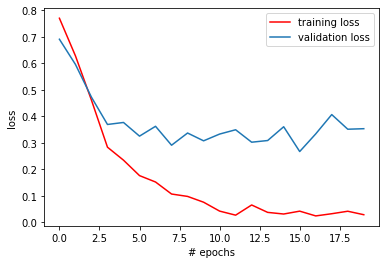

In [19]:
#here epoch with minimum validation loss is noted
from matplotlib import pyplot as plt
#Graphs for loss and epochs
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [20]:
#Training accuracy
print(model.evaluate(train_data,train_target))

1237/1237 [==============================] - 19s 16ms/step
[0.07781365122977364, 0.978173017501831]


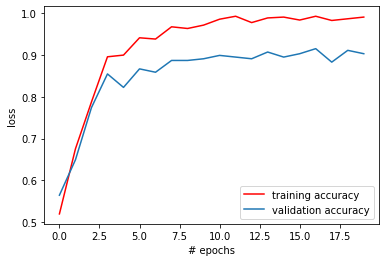

In [21]:
#accuracy for graphs
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [22]:
#Test accuracy
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 2s 16ms/step
[0.13621544233266858, 0.9710144996643066]
